In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(patchwork))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)
addArchRGenome("hg38")

Setting default number of Parallel threads to 64.

Setting default genome to Hg38.



In [3]:
proj1 <- loadArchRProject("/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject", showLogo = FALSE)
proj2 <- loadArchRProject("/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!



In [7]:
proj1


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject 
samples(5): 11T 12T 13T 12N 19T
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletScore
  DoubletEnrichment
numberOfCells(1): 39141
medianTSS(1): 17.511
medianFrags(1): 9735

In [4]:
cellColData1 <- getCellColData(proj1)
cellColData2 <- getCellColData(proj2)

In [5]:
cellColData1

DataFrame with 39141 rows and 15 columns
                            Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                       <character>     <numeric>  <numeric>       <numeric>
11T#CGCACAGTCGATGTAC-1         11T        12.005      10258           10217
11T#ACCGGGTCACATTCTT-1         11T        10.444       8808            9165
11T#CCTATTAAGCGATACG-1         11T        12.725      14529           15421
11T#GTAGTACTCCATACCC-1         11T        15.503      20567           20043
11T#AGCTATGCAGGTGGTA-1         11T        11.096      12445           13072
...                            ...           ...        ...             ...
19T#TTGCGAATCATCGCCT-1         19T        15.491       1236            1325
19T#AGATAGAGTACTTGAC-1         19T        19.865       1886            1860
19T#TGGAAGGCATTAGCCA-1         19T         9.190        659             749
19T#TACAGCAAGATTAGAC-1         19T        23.774       2041            1791
19T#TCAGTCCTCGGATAGG-1         19T        18.14

In [6]:
cellColData2

DataFrame with 46876 rows and 15 columns
                            Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                       <character>     <numeric>  <numeric>       <numeric>
18T#CAATCCCAGAACTCCT-1         18T         8.782      24843           28427
18T#AACAGTCAGGCTCAGA-1         18T        12.237      31010           31403
18T#CGGTGCAGTTACCCAA-1         18T         9.633      24624           26992
18T#AATGTCGAGGTCGGTA-1         18T         9.626      26018           28326
18T#ACATGCACACACACAT-1         18T         9.590      18646           20552
...                            ...           ...        ...             ...
22T#CGTAAACGTGCCAAGA-1         22T        19.443       1895            1716
22T#ATTACCTTCCATAGGT-1         22T        17.804       1996            1803
22T#GGGACCTTCGCCGAAC-1         22T        12.833       1173            1341
22T#GTGATCAAGAAGACTT-1         22T        19.491       2510            2243
22T#GAAGTCTGTCGATTAC-1         22T        18.85

In [11]:
arrow_fold1 <- list.files("/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles",pattern = "\\.arrow$",full.names = TRUE)
arrow_fold2 <- list.files("/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles",pattern = "\\.arrow$",full.names = TRUE)
arrow_fold1

[1] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/11T.arrow"
[2] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/12N.arrow"
[3] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/12T.arrow"
[4] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/13T.arrow"
[5] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/19T.arrow"

In [13]:
combinedArrowFiles <- c(arrow_fold1,arrow_fold2)
combinedArrowFiles 

[1] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/11T.arrow"  
 [2] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/12N.arrow"  
 [3] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/12T.arrow"  
 [4] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/13T.arrow"  
 [5] "/home/hanxue/lab/scATAC/BCY_ATAC_R/after_neoadjuvant/ArchRProject/ArrowFiles/19T.arrow"  
 [6] "/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles/10N.arrow"
 [7] "/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles/10T.arrow"
 [8] "/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles/18T.arrow"
 [9] "/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles/20T.arrow"
[10] "/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles/21T.arrow"
[11] "/home/hanxue/lab/scATAC/BCY_ATAC_R/without_neoadjuvant/ArchRProject/ArrowFiles/22T.arrow"

In [14]:
combinedproj <- ArchRProject(
  ArrowFiles = combinedArrowFiles, 
  outputDirectory = "./ArchRProject",
  showLogo = FALSE,
  copyArrows = TRUE #This is recommened so that you maintain an unaltered copy for later usage.
                    # 保存原始的未更改副本
)

Using GeneAnnotation set by addArchRGenome(Hg38)!



Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 


Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...



### 合并后质量控制有了，但没有去除双细胞

In [19]:
combinedproj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject 
samples(11): 11T 12N ... 21T 22T
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 94555
medianTSS(1): 17.122
medianFrags(1): 13780

In [15]:
table(combinedproj$Sample)


  10N   10T   11T   12N   12T   13T   18T   19T   20T   21T   22T 
11653 11552  9557  7983  7678 10878  6488  6834  7615  8495  5822 

In [17]:
getCellColData(combinedproj)

DataFrame with 94555 rows and 15 columns
                            Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                       <character>     <numeric>  <numeric>       <numeric>
11T#CTTAATCTCCAAGTCA-1         11T        10.614      12778           12820
11T#CGCACAGTCGATGTAC-1         11T        12.005      10258           10217
11T#TGTAGCATCCCGTAGG-1         11T        12.236      17117           17575
11T#ACCGGGTCACATTCTT-1         11T        10.444       8808            9165
11T#GAAATGATCACGTCAA-1         11T        14.017      15608           15609
...                            ...           ...        ...             ...
22T#CGTAAACGTGCCAAGA-1         22T        19.443       1895            1716
22T#ATTACCTTCCATAGGT-1         22T        17.804       1996            1803
22T#GGGACCTTCGCCGAAC-1         22T        12.833       1173            1341
22T#GTGATCAAGAAGACTT-1         22T        19.491       2510            2243
22T#GAAGTCTGTCGATTAC-1         22T        18.85

In [20]:
df <- getCellColData(combinedproj, select = c("log10(nFrags)", "TSSEnrichment"))
df

DataFrame with 94555 rows and 2 columns
                       log10(nFrags) TSSEnrichment
                           <numeric>     <numeric>
11T#CTTAATCTCCAAGTCA-1       4.69945        10.614
11T#CGCACAGTCGATGTAC-1       4.67151        12.005
11T#TGTAGCATCCCGTAGG-1       4.63896        12.236
11T#ACCGGGTCACATTCTT-1       4.62581        10.444
11T#GAAATGATCACGTCAA-1       4.60726        14.017
...                              ...           ...
22T#CGTAAACGTGCCAAGA-1       3.48044        19.443
22T#ATTACCTTCCATAGGT-1       3.47986        17.804
22T#GGGACCTTCGCCGAAC-1       3.47943        12.833
22T#GTGATCAAGAAGACTT-1       3.47857        19.491
22T#GAAGTCTGTCGATTAC-1       3.47727        18.852

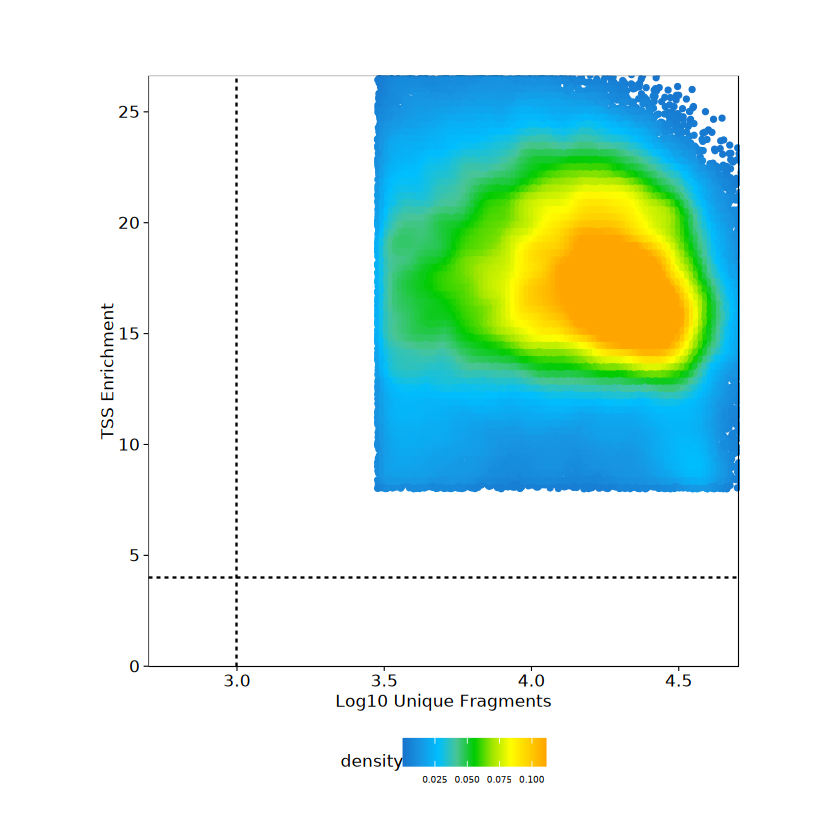

In [21]:
p <- ggPoint(
    x = df[,1], 
    y = df[,2], 
    colorDensity = TRUE,
    continuousSet = "sambaNight",
    xlabel = "Log10 Unique Fragments",
    ylabel = "TSS Enrichment",
    xlim = c(log10(500), quantile(df[,1], probs = 0.99)),
    ylim = c(0, quantile(df[,2], probs = 0.99))
) + geom_hline(yintercept = 4, lty = "dashed") + geom_vline(xintercept = 3, lty = "dashed")

p

In [22]:
# mkdir DoubletScores
# Inferring scATAC-seq Doublets with ArchR
# 添加预测doublets信息
combinedproj <- addDoubletScores(
    input = combinedproj,
    k = 10, #Refers to how many cells near a "pseudo-doublet" to count.
    knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
    LSIMethod = 1,
    outDir = "./DoubletScores"
)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-3588997a0e8b8f-Date-2025-02-24_Time-10-40-54.981497.log
If there is an issue, please report to github with logFile!

2025-02-24 10:40:55.246934 : Batch Execution w/ safelapply!, 0 mins elapsed.

2025-02-24 10:40:55.253636 : 10T (1 of 11) :  Computing Doublet Statistics, 0 mins elapsed.

10T (1 of 11) : UMAP Projection R^2 = 0.9953

10T (1 of 11) : UMAP Projection R^2 = 0.9953

2025-02-24 10:45:56.290584 : 10N (2 of 11) :  Computing Doublet Statistics, 5.017 mins elapsed.

10N (2 of 11) : UMAP Projection R^2 = 0.99886

10N (2 of 11) : UMAP Projection R^2 = 0.99886

2025-02-24 10:50:02.146277 : 13T (3 of 11) :  Computing Doublet Statistics, 9.115 mins elapsed.

13T (3 of 11) : UMAP Projection R^2 = 0.9982

13T (3 of 11) : UMAP Projection R^2 = 0.9982

2025-02-24 10:53:44.441458 : 20T (4 of 11) :  Computing Doublet Statistics, 12.82 mins elapsed.

20T (4 of 11) : UMAP Projection R^2 = 0.99909

20T (4 of 11) : UMAP Projection R^2 = 0.9990

In [23]:
## remove doublets
## 过滤
combinedproj <- filterDoublets(combinedproj)

Filtering 8538 cells from ArchRProject!

	11T : 913 of 9557 (9.6%)

	12N : 637 of 7983 (8%)

	12T : 589 of 7678 (7.7%)

	13T : 1183 of 10878 (10.9%)

	19T : 467 of 6834 (6.8%)

	10N : 1357 of 11653 (11.6%)

	10T : 1334 of 11552 (11.5%)

	18T : 420 of 6488 (6.5%)

	20T : 579 of 7615 (7.6%)

	21T : 721 of 8495 (8.5%)

	22T : 338 of 5822 (5.8%)



In [24]:
getCellColData(combinedproj)

DataFrame with 86017 rows and 15 columns
                            Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                       <character>     <numeric>  <numeric>       <numeric>
11T#CGCACAGTCGATGTAC-1         11T        12.005      10258           10217
11T#ACCGGGTCACATTCTT-1         11T        10.444       8808            9165
11T#CCTATTAAGCGATACG-1         11T        12.725      14529           15421
11T#GTAGTACTCCATACCC-1         11T        15.503      20567           20043
11T#AGCTATGCAGGTGGTA-1         11T        11.096      12445           13072
...                            ...           ...        ...             ...
22T#CGTAAACGTGCCAAGA-1         22T        19.443       1895            1716
22T#ATTACCTTCCATAGGT-1         22T        17.804       1996            1803
22T#GGGACCTTCGCCGAAC-1         22T        12.833       1173            1341
22T#GTGATCAAGAAGACTT-1         22T        19.491       2510            2243
22T#GAAGTCTGTCGATTAC-1         22T        18.85

In [31]:
### 添加新辅前后信息到proj中
neoadjuvant_annotations <- list(
    "after_neoadjuvant" = c("11T", "12T", "12N", "13T", "19T"),
    "without_neoadjuvant" = c("10N", "10T", "18T", "20T", "21T", "22T")
)
idz <- lapply(neoadjuvant_annotations, function(x) which(combinedproj$Sample %in% x))
# 创建proj$type列，长度为proj@cellColData的行数，初始化为NA
combinedproj$neoadjuvant <- rep(NA, nrow(combinedproj@cellColData))
# 遍历idz中的每一个元素，将combinedproj$type中对应的索引赋值为元素的名称
for(i in names(idz)){combinedproj$neoadjuvant[idz[[i]]] <- i}

In [32]:
combinedproj@cellColData$neoadjuvant

character-Rle of length 86017 with 2 runs
  Lengths:                 39141                 46876
  Values :   "after_neoadjuvant" "without_neoadjuvant"

In [33]:
## Save data
saveArchRProject(ArchRProj = combinedproj, 
                 load = FALSE)

Saving ArchRProject...



In [34]:
## Session information

sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] nabor_0.5.0                       Seurat_5.2.1                     
 [3] SeuratObject_5.0.2                sp_2.2-0                         
 [5] BSgenome.Hsapiens